In [1]:
! pip install git+https://github.com/flaviovdf/musica.git

  Cloning https://github.com/flaviovdf/musica.git to /tmp/pip-req-build-oqn7tws1
  Running command git clone -q https://github.com/flaviovdf/musica.git /tmp/pip-req-build-oqn7tws1
  Created wheel for musica-dcc-ufmg: filename=musica_dcc_ufmg-0.1-py3-none-any.whl size=3357 sha256=d2fb5a1cde4f04495721e6c20afe41b6d7916858914823f6064a7923c73fad43
  Stored in directory: /tmp/pip-ephem-wheel-cache-8e9e01df/wheels/94/cb/e0/72e4ee72153bf78a970722ac92a93e8a8f31c1853e32a3d1bc
Successfully built musica-dcc-ufmg


# Classificando Instrumentos

**Objetivos**
1. Passar para os discentes qual será o ambiente base que vamos utilizar neste curso
1. Listar quais são as bibliotecas necessárias
1. Um pequeno tutorial de instalação de pacotes

**Resultado Esperado**
1. Um pequeno ambiente com miniconda além das bibliotecas que vamos utilizar
1. Principalmente relevante para discentes que não tem tanto conhecimento de Python

Este notebook deve explorar um pouco do ciclo de trabalho completo do profissional de MIR!

![alt text](https://dcc.ufmg.br/~flaviovdf/mir/lab06/imgs/fig-0.png)

In [2]:
from μsica import μsf
from μsica import μsp


import librosa
import librosa.display

import IPython.display as ipd

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
μsf.download('https://dcc.ufmg.br/~flaviovdf/mir/lab06/files.zip', 'files.zip',
             False)
μsf.extract('files.zip', '.')

files.zip: 172MB [00:20, 9.01MB/s]


In [4]:
μsp.init_matplotlib()
plt.ion()

## Arquivos de Música

Antes de executar tarefas de aprendizado de máquina, temos que processar nossos arquivos. Alguns dos passos são demonstrados na figura abaixo.

![alt text](fig-1.png)

Para chegar no nosso objetivo final, acompanhando este Notebook deve vir uma pasta com alguns arquivos de música tanto no formato [AIFF](https://en.wikipedia.org/wiki/Audio_Interchange_File_Format) quanto no formato [WAV](https://en.wikipedia.org/wiki/WAV). No meu computador tive problemas com os arquivos AIFF, por isso faço uso do .wav abaixo.

Para observar os arquivos podemos fazer uso de alguns comandos Unix. Para executar comandos do terminal no Notebook, basta utilizar `!`.

In [ ]:
! ls instrument

clarinet  flute  vibraphone  violin


In [ ]:
! ls instrument/flute

flute.nonvib.ff.B3B4.aiff  flute.nonvib.ff.C6B6.aiff
flute.nonvib.ff.B3B4.wav   flute.nonvib.ff.C6B6.wav
flute.nonvib.ff.C5B5.aiff  flute.nonvib.ff.C7Db7.aiff
flute.nonvib.ff.C5B5.wav   flute.nonvib.ff.C7Db7.wav


Observe como cada pasta contém uma série de arquivos. Vamos tocar um deles. Para tocar arquivos de música bastar fazer uso da chamada:

[IPython.display.Audio](https://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html)

In [ ]:
import IPython.display as ipd
ipd.Audio(filename='instrument/flute/flute.nonvib.ff.B3B4.wav')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import IPython.display as ipd
ipd.Audio(filename='instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav')

## Observando a forma de onda

Agora podemos prosseguir e observar um pouco qual é a [Forma de onda](https://pt.wikipedia.org/wiki/Forma_de_onda) destes arquivos. Aqui o LibRosa é particularmente útil, pois o mesmo consegue ler o arquivo de dados e nos indicar qual a [taxa de amostragem](https://pt.wikipedia.org/wiki/Amostragem_de_sinal) do mesmo.

Assim como arquivos de vídeo, é necessário fazer uma amostragem do sínal música para um formato digital. A taxa de amostragem nos indica, na média, quantas amostras existem em um segundo.

In [ ]:
flute1, sr_flute_1 = librosa.load('instrument/flute/flute.nonvib.ff.B3B4.wav')
sr_flute_1

22050

Observe como a chamada retorna 2 valores. O primeiro é o sinal na forma de um vetor numpy. O segundo é a taxa de amostragem. Cada som na pasta foi amostrado em uma taxa de `22kHz` (22 mil amostras por segundo, já que 1Hz é um ciclo por segundo).

Abaixo vemos o tipo do arquivo de música na memória.

In [ ]:
type(flute1)

numpy.ndarray

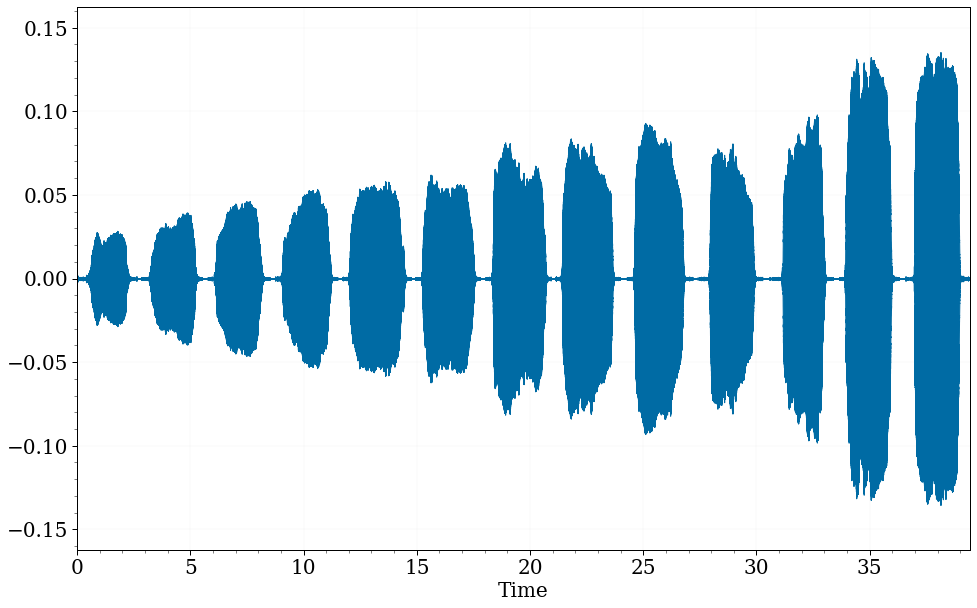

In [ ]:
import librosa.display
fig, ax = plt.subplots(1, 1)
librosa.display.waveplot(flute1, sr=sr_flute_1, ax=ax)

Observe que o nosso vetor tem mais ou menos 86000 quadros, ou posições.

In [ ]:
flute1.shape

(869341,)

Como tal música foi amostrada com 22k quadros por segundo, basta fazer `86k/22k` para chegar na duração final. Isto deve ser próximo de 39 segundos, assim como é exemplificado no gráfico acima.

In [ ]:
flute1.shape[0] / 22050

39.42589569160998

Vamos comparar com um um violino

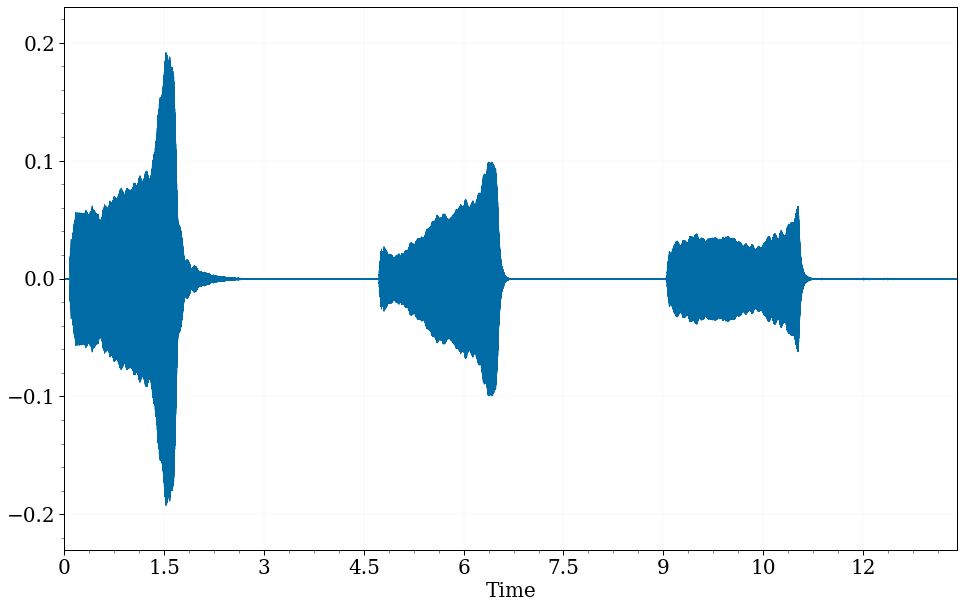

In [ ]:
vio1, sr_vio_1 = librosa.load('instrument/violin/Violin.arco.ff.sulA.A4B4.mono.wav')
fig, ax = plt.subplots(1, 1)
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax)

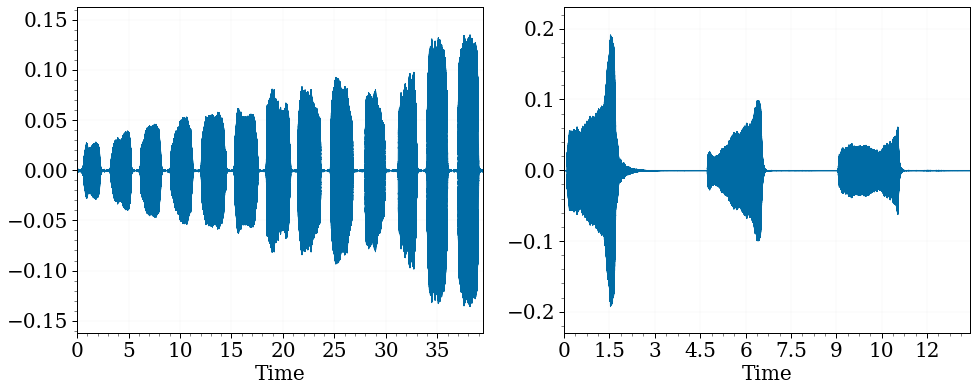

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
librosa.display.waveplot(flute1, sr=sr_vio_1, ax=ax[0])
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax[1])

Nossa primeira tenativa de resolver este problema será em usar o vetor musical direto como atributos de um algoritmo de aprendizado de máquina. Com tal objetivo, já podemos observar alguns dos problemas que vamos ter ao fazer o processamento de músicas. 

O primeiro é que dependendo do caso, teremos `869341` atributos. Algo bem irreal de tratar com aprendizado de máquina simples. O segundo, também importante, é que cada arquivo tem uma duração diferente. Tal problema limita, por exemplo, o uso de algoritmos de aprendizado de máquina que necessitam da mesma quantidade de atributos por exemplo.

Tal problema motiva o uso de técnicas de MIR que convertem músicas em atributos mais simples. Assim, podemos aplicar técnicas de aprendizado de máquina. Até o momento no curso não vimos como tais técnicas funcionam, porém neste notebook podemos ter uma noção de qual é o fluxo de trabalho do profissional de MIR.

## Olhando o Espectograma

Para tratar com tais problemas, vamos então extrair atributos do [Espectograma](https://en.wikipedia.org/wiki/Spectrogram) da música. A extração de espectogramas será tratada ainda na primeira parte do curso. Observe os comentários das chamadas abaixo.

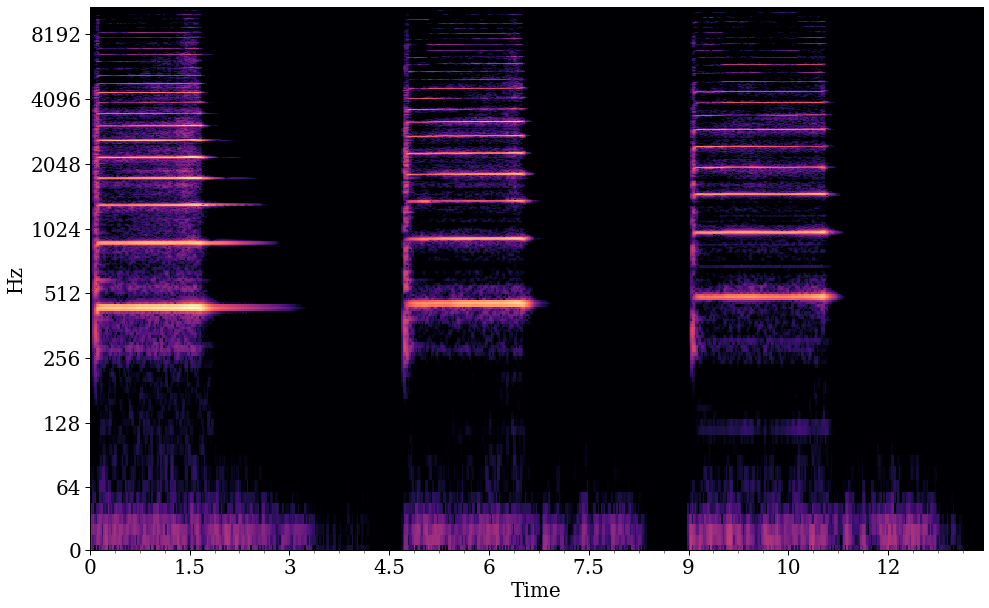

In [ ]:
# Faça a transformada de Fourier do sinal. Assim pegamos "a quantidade" de sinal em cada frequência por segundo.
transform = librosa.stft(y=vio1)

# Como a transformada de fourier é um número complexo, multiplique os coeficientes.
S, phase = librosa.magphase(transform)

# Plote o espectograma
fig, ax = plt.subplots(1, 1)
mesh = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), # intensidade da cor em decibéis
                                y_axis='log', x_axis='time', ax=ax)

Um atributo interessante é o centroide do espectograma. De forma simples, para cada janela de tempo tiramos o centroide da intensidade, convertendo assim o espectograma para um valor simples.

[Text(0.5, 1.0, 'log Power spectrogram')]

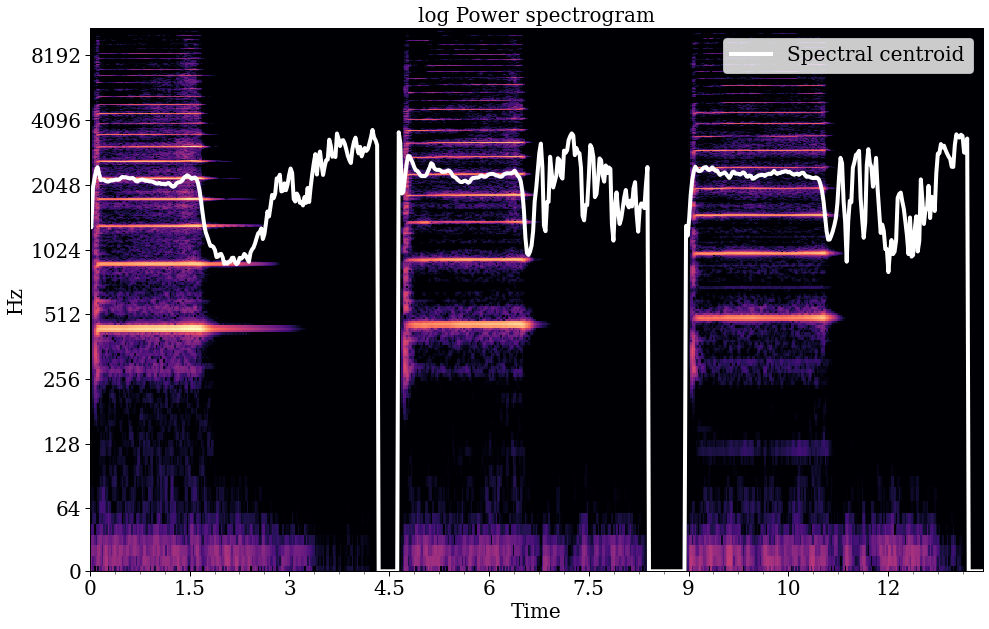

In [ ]:
cent = librosa.feature.spectral_centroid(y=vio1)
times = librosa.times_like(cent)
S, phase = librosa.magphase(librosa.stft(y=vio1))

fig, ax = plt.subplots(1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

Vamos comparar com outro instrumento.

[Text(0.5, 1.0, 'log Power spectrogram')]

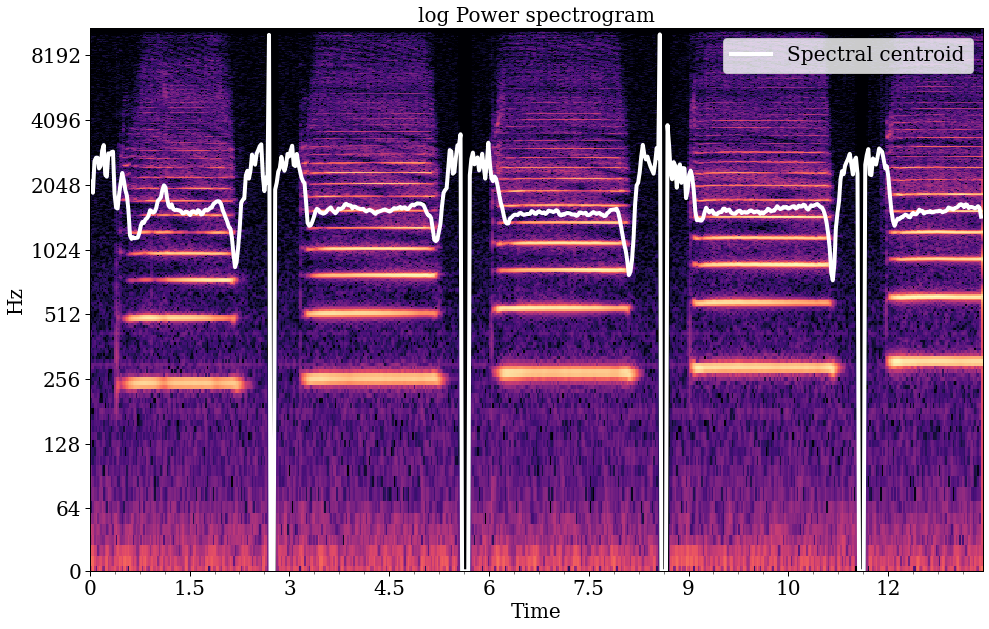

In [ ]:
flute_trim = flute1[:len(vio1)] # Cortando a flauta para a mesma quantidade de tempo do violino

cent = librosa.feature.spectral_centroid(y=flute_trim)
times = librosa.times_like(cent)
S, phase = librosa.magphase(librosa.stft(y=flute_trim))

fig, ax = plt.subplots(1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## Segmentando

Observe mais uma vez um único arquivo. Uma característica importante do mesmo é que a mesma nota é repetida várias vezes. Isto permite ampliar nossa base de dados caso tais segmentos sejam identificáveis. 

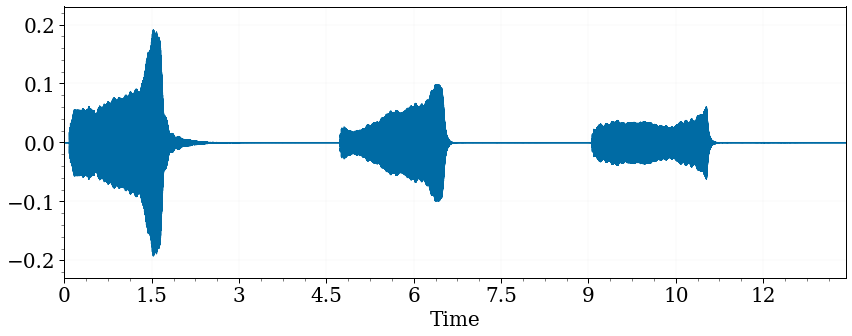

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
librosa.display.waveplot(vio1, sr=sr_vio_1, ax=ax)

Vamos entender quantos elementos são zero e quantos são diferentes de zero. Um fator interessante de numpy é que podemos de forma muito simples criar vetores de booleanos.

In [ ]:
is_zero = vio1 == 0
print(is_zero)
print(is_zero.sum())

[False False False ...  True  True  True]
40924


Aqui são os diferentes de zero.

In [ ]:
is_zero = vio1 != 0
print(is_zero.sum())

254897


Para mostrar a ideia da segmentação vamos usar um vetor mais simples.

```python
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
d = np.array(x == 0, dtype='i')
```

O vetor `d` vai ter a seguinte forma:

```array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int32)```

Ou seja, o mesmo vai ser 1 quando o elemento é zero em `x`. Vai ter valor 0 caso contrário.

Agora, observe as diferenças entre elementos consecutivos de `d`:

```
1 - 1 = 0 (isto quer dizer que temos dois zeros lado a lado)
0 - 1 = -1 (isto quer dizer que chegamos em um valor não zero)
1 - 0 = 1 (isto quer dizer que chegamos em um valor não zero)
```

Podemos criar esse vetor de forma simples com o comando `np.diff`.

In [ ]:
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
d = np.array(x == 0, dtype='i')
np.diff(d, prepend=d[0]) # o prepend é para garantir a mesma dimensão de x

array([ 0,  0, -1,  0,  0,  1,  0, -1,  0,  1], dtype=int32)

Em absoluto

In [ ]:
bg_ed = np.abs(np.diff(d, prepend=d[0]))

Como `bg_ed[2] == 1`, estamos indicando que algum sinal começa aqui. Olhe se não é verdade em:

```python
x = np.array([0, 0, 2, 3, 4, 0, 0, 4, 5, 0])
```

`x[2] = 2`. Agora, como `bg_ed[5] == 1`, estamos dizendo que o sinal termina em 5. Ou seja, de `[2:5]` é sinal!

`np.where` acha tal sinal!

In [ ]:
idx = np.where(bg_ed)[0]
idx

array([2, 5, 7, 9])

Agora basta iterar par a par e achar os segmentos!

**o código até aqui só funciona se o sinal termina em zero, mas ok, dá para entender a ideia**

In [ ]:
for i in range(0, len(idx), 2):
    if i + 1 < len(idx):
        bg = idx[i]
        ed = idx[i+1]
        
        print(x[bg:ed])

[2 3 4]
[4 5]


Agora podemos criar nossa função. A heurística acima não é perfeita pois o vetor das notas não é realmente zerado. De qualquer forma, podemos considerar que uma nota toca por pelo menos 1 segundo. Quantos quadros equivalem a um segundo? *A taxa de amostragem!*.

In [ ]:
def segment(x, sr=22050):
    x = [0] + [d for d in x] + [0]
    x = np.array(x)
    d = np.array(x == 0, dtype='i')
    bg_ed = np.abs(np.diff(d, prepend=d[0]))
    idx = np.where(bg_ed)[0]
    for i in range(0, len(idx), 2):
        if i + 1 < len(idx):
            bg = idx[i]
            ed = idx[i+1]
            cand = x[bg:ed]
            
            if len(cand) >= sr:
                yield cand

Observe como temos várias notas em um único arquivo.

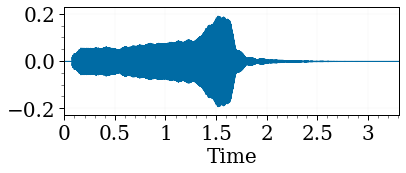

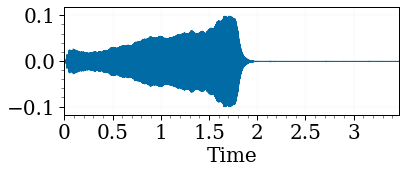

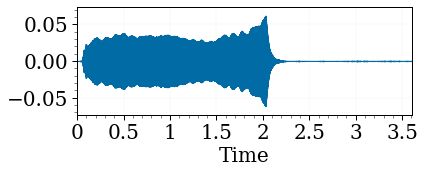

In [ ]:
for note in segment(vio1):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    librosa.display.waveplot(note, sr=sr_vio_1, ax=ax)
    plt.show()

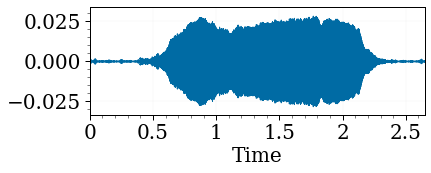

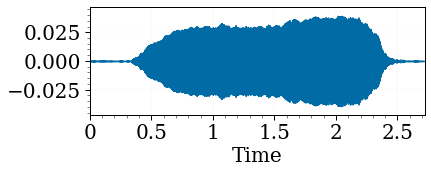

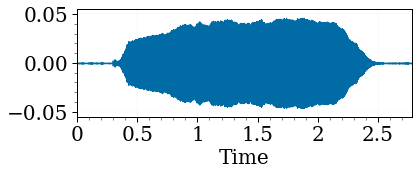

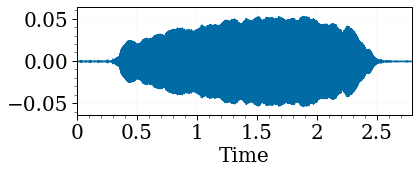

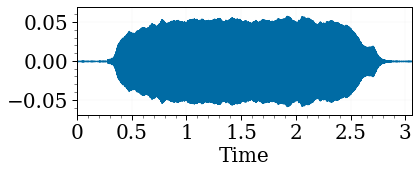

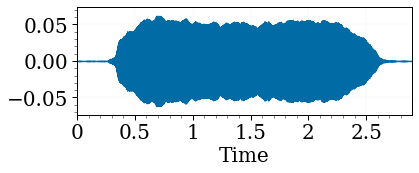

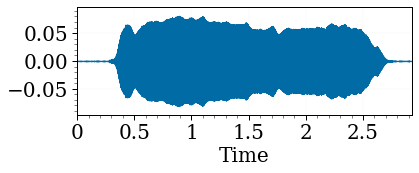

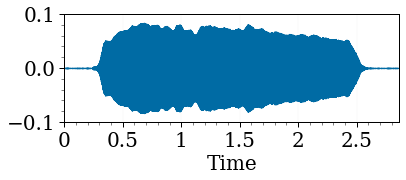

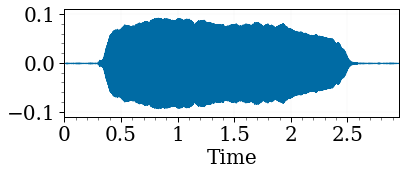

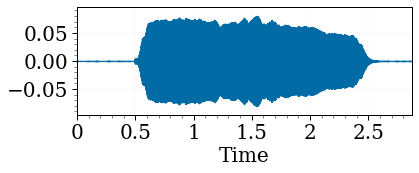

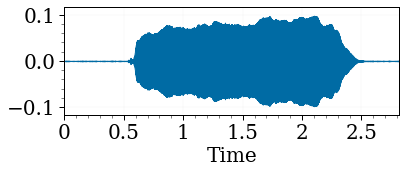

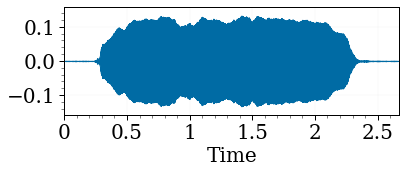

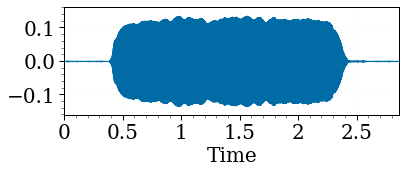

In [ ]:
for note in segment(flute1):
    fig, ax = plt.subplots(1, 1, figsize=(6, 2))
    librosa.display.waveplot(note, ax=ax)
    plt.show()

## Um Classificador Ainda sem Entender MIR com Detalhes

### Criando uma Base de Dados

Para começar nossa tarefa de um classificador ultra simples, primeiro temos que ler todo o conjunto de músicas. Aqui, o módulo [Glob](https://docs.python.org/3/library/glob.html) de Python vai ser útil. O mesmo permite uma navegação em todas as pastas de um diretório via expressões regulares.

In [ ]:
import glob

Observe a chamada abaixo:
1. Na pasta instrument
1. Entre em quaquer, `*/`, subpasta
1. Além do mais, procure qualquer coisa em `wav`, `*.wav`.

In [ ]:
glob.glob('instrument/*/*.wav')

['instrument/vibraphone/Vibraphone.dampen.ff.Bb4.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.F3.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Gb3.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Db5.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.A5.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.A3.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.E4.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Db6.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.A4.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.D4.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Ab5.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.C6.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.E5.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.Bb5.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.C4.stereo.wav',
 'instrument/vibraphone/Vibraphone.dampen.ff.F5.stereo.wav',
 'instrument/vibra

Agora um pouco de magia python para ler tudo. Explicando o código abaixo.

1. Leia o arquivo com LibRosa.
2. Guarde a taxa de amostragem em um conjunto
3. Separe o arquivo por instrumento em um dicionário

Além disso vamos nos limitar a 4 amostras por instrumento (primeiro if).

In [ ]:
raw_data = {}
rates = set()
for fpath in glob.glob('instrument/*/*.wav'):
    inst_name = fpath.split('/')[1]
    if inst_name in raw_data and len(raw_data[inst_name]) == 10:
        continue
        
    audio, sr = librosa.load(fpath)
    rates.add(sr)
    
    if inst_name not in raw_data:
        raw_data[inst_name] = []
        
    raw_data[inst_name].append(audio)

Os exemplos tem tamanhos diferentes, já vamos tratar.

In [ ]:
for inst in raw_data:
    print(inst)
    for aud in raw_data[inst]:
        print(len(aud))

vibraphone
21037
35178
28328
18981
20219
24572
40570
26075
22097
24837
violin
295821
550171
1078708
1976128
1190781
186564
2748950
431124
1557180
2249842
flute
682644
869341
117184
743425
clarinet
591255
302571
709504
681300


Ok, agora vamos extrair o centroide espectral de cada arquivo. Como os arquivos tem tamanhos diferentes, cada centroide também vai ter tamanhos diferentes. Tais tamanhos são definidos pelo tamanho da janela utilizada para fazer a transformada de fourier (novamente, assunto futuro). Vamos observar qual o menor tamanho na base. Parece que é 30!

In [ ]:
for inst in raw_data:
    for aud in raw_data[inst]:
        cent = librosa.feature.spectral_centroid(y=aud, sr=22000)
        print(cent.shape)

(1, 42)
(1, 69)
(1, 56)
(1, 38)
(1, 40)
(1, 48)
(1, 80)
(1, 51)
(1, 44)
(1, 49)
(1, 578)
(1, 1075)
(1, 2107)
(1, 3860)
(1, 2326)
(1, 365)
(1, 5370)
(1, 843)
(1, 3042)
(1, 4395)
(1, 1334)
(1, 1698)
(1, 229)
(1, 1453)
(1, 1155)
(1, 591)
(1, 1386)
(1, 1331)


Vamos criar um DataFrame pandas sem nada. O mesmo será usado para nosso classificador.

In [ ]:
names = ['instrument']
for i in range(30):
    names.append(f'cent_{i}')
df = pd.DataFrame(columns=names)
df

,instrument,cent_0,cent_1,cent_2,cent_3,cent_4,cent_5,cent_6,cent_7,cent_8,cent_9,cent_10,cent_11,cent_12,cent_13,cent_14,cent_15,cent_16,cent_17,cent_18,cent_19,cent_20,cent_21,cent_22,cent_23,cent_24,cent_25,cent_26,cent_27,cent_28,cent_29


O código abaixo cola os 30 primeiros valores de cada centroid em uma linha do dataframe.

In [ ]:
for inst in raw_data:
    for aud in raw_data[inst]:
        cent = librosa.feature.spectral_centroid(y=aud)
        row = {}
        for i in range(30):
            row[f'cent_{i}'] = cent[0, i]
        row['instrument'] = inst
        df = df.append(row, ignore_index=True)

In [ ]:
df

,instrument,cent_0,cent_1,cent_2,cent_3,cent_4,cent_5,cent_6,cent_7,cent_8,cent_9,cent_10,cent_11,cent_12,cent_13,cent_14,cent_15,cent_16,cent_17,cent_18,cent_19,cent_20,cent_21,cent_22,cent_23,cent_24,cent_25,cent_26,cent_27,cent_28,cent_29
0,vibraphone,2353.883349,2073.529925,1538.805177,869.878886,791.430260,725.787078,696.423659,688.067178,673.599392,650.159456,626.420917,617.514756,616.436931,613.372736,614.773703,629.386846,657.439869,691.873110,730.478260,788.326771,881.197810,985.865755,1162.628013,1410.591341,1687.892928,2019.477107,2332.214934,2755.282576,2874.045453,2927.398291
1,vibraphone,2080.232000,2011.602599,1875.344611,1727.872874,1638.391749,1553.508143,1495.269322,1506.486491,1502.613281,1537.356216,1616.124516,1673.043249,1728.389016,1797.705627,1764.515668,1806.428823,1888.275197,1977.146746,2024.860296,2071.930821,2141.442753,2151.070530,2098.762149,2142.006199,2249.881641,2339.017505,2315.505397,2341.821669,2461.359399,2540.354974
2,vibraphone,2064.179154,1977.632904,1785.833240,1595.693588,1515.452359,1470.500578,1437.355123,1459.468391,1487.823180,1570.459295,1680.683323,1761.547849,1756.999071,1743.223698,1767.832962,1827.127338,1903.371113,1922.185021,1947.775245,1992.967254,2022.930835,2040.859962,2083.644213,2154.819908,2203.233080,2244.114461,2267.714821,2331.127059,2394.424976,2456.022901
3,vibraphone,1689.322569,1338.897787,847.136771,778.307368,732.190064,717.339857,700.190775,681.808167,670.639994,664.197252,664.766181,668.980231,666.038759,683.113053,710.155631,736.372601,753.111384,816.173595,906.952155,1029.872362,1154.381824,1251.829853,1446.299328,1744.696794,2026.620144,2288.869130,2417.513847,2491.509809,2592.689367,2695.781295
4,vibraphone,1850.989597,1629.977297,1208.462007,1114.105907,1064.107027,1059.320644,1029.454385,1015.797284,1032.129225,1057.683543,1058.980445,1048.806301,1056.032713,1085.336187,1127.765186,1189.411092,1293.618448,1373.135676,1503.615976,1591.324141,1714.286304,1893.809115,2036.384455,2182.342047,2267.738766,2520.307346,2581.332624,2621.597274,2646.000335,2855.721718
5,vibraphone,2001.425838,1918.827753,1559.785742,1333.944507,1237.797560,1192.680489,1182.355252,1191.269046,1191.549410,1148.696774,1077.560871,1066.058485,1105.967125,1211.933429,1337.722175,1422.280293,1452.227199,1532.616017,1633.546840,1672.152585,1695.390429,1678.407454,1723.489443,1785.132675,1821.661976,1885.615008,1981.754886,2105.445634,2184.436283,2267.856625
6,vibraphone,1845.266208,1695.283937,1379.092709,1097.831070,1058.125432,1013.992913,959.412666,955.836744,962.254882,965.067447,987.832158,1037.557428,1100.096890,1189.647947,1297.657682,1403.048706,1443.308472,1436.807517,1469.418177,1523.812004,1565.002995,1588.860026,1622.364088,1659.354722,1676.797978,1750.181945,1765.360818,1775.993036,1819.057538,1897.272991
7,vibraphone,1914.452012,1787.376363,1512.440395,1253.793775,1193.691063,1154.665015,1113.286345,1081.157421,1055.798242,1036.891984,1042.453643,1085.858990,1120.044425,1087.008443,1097.983018,1150.381129,1290.639005,1258.909016,1306.611343,1326.593630,1484.802625,1562.304866,1632.099679,1690.610890,1871.044527,2285.691615,2427.855181,2515.631204,2919.309106,2976.036032
8,vibraphone,2333.244376,2079.251570,1484.675714,990.774810,876.522576,838.544512,813.796429,797.129607,774.161574,744.219405,702.183285,668.115924,637.781178,611.481511,623.818985,652.987901,675.726759,687.444171,749.523492,844.389024,967.892714,1165.982146,1438.733510,1804.092216,2181.514723,2471.904295,2380.854753,2547.321242,2740.871086,2912.668986
9,vibraphone,2204.306505,2073.862762,1733.289359,1168.792363,961.521790,850.285522,766.307490,688.104067,597.489011,576.841838,591.936673,598.630073,620.303508,680.599715,745.270426,875.877731,1045.992971,1266.000751,1537.968076,1672.519691,1730.925405,1842.223080,1937.150886,2002.410174,2140.796471,2270.663303,2301.449722,2429.288095,2497.743460,2539.972240


### Ufa! Finalmente, vamos classificar!

Agora podemos passar para o o nosso classificador. Observe no código abaixo como **a média das 30 janelas da média do espectograma**, leia isso com calma, é bem diferente para cada instrumento. O código usa pandas para:

1. Selecionar as 4 amostras de cada instrumento.
2. Tirar a média dos valores em cada coluna, a média da média do espectograma.

Tal diferença indica que deve ser possível fazer um trabalho até razoável de classificação com essa base.

In [ ]:
for inst in raw_data:
    sub_df = df[df['instrument'] == inst]
    media = sub_df.mean(axis='columns')
    print(inst)
    print(media)
    print()

vibraphone
0    1222.806082
1    1935.277315
2    1895.566763
3    1218.858598
4    1590.319102
5    1553.319593
6    1398.053238
7    1541.180699
8    1306.586949
9    1431.617439
dtype: float64

violin
10    2137.529951
11    1543.283246
12    1382.650425
13       0.000000
14    1276.899906
15      83.581927
16    1261.151271
17       0.000000
18       0.000000
19    1355.560699
dtype: float64

flute
20    2176.151612
21    2159.448546
22    3006.946173
23    2118.381728
dtype: float64

clarinet
24      0.000000
25     52.247478
26      0.000000
27    765.271926
dtype: float64



In [ ]:
df

,instrument,cent_0,cent_1,cent_2,cent_3,cent_4,cent_5,cent_6,cent_7,cent_8,cent_9,cent_10,cent_11,cent_12,cent_13,cent_14,cent_15,cent_16,cent_17,cent_18,cent_19,cent_20,cent_21,cent_22,cent_23,cent_24,cent_25,cent_26,cent_27,cent_28,cent_29
0,vibraphone,2353.883349,2073.529925,1538.805177,869.878886,791.430260,725.787078,696.423659,688.067178,673.599392,650.159456,626.420917,617.514756,616.436931,613.372736,614.773703,629.386846,657.439869,691.873110,730.478260,788.326771,881.197810,985.865755,1162.628013,1410.591341,1687.892928,2019.477107,2332.214934,2755.282576,2874.045453,2927.398291
1,vibraphone,2080.232000,2011.602599,1875.344611,1727.872874,1638.391749,1553.508143,1495.269322,1506.486491,1502.613281,1537.356216,1616.124516,1673.043249,1728.389016,1797.705627,1764.515668,1806.428823,1888.275197,1977.146746,2024.860296,2071.930821,2141.442753,2151.070530,2098.762149,2142.006199,2249.881641,2339.017505,2315.505397,2341.821669,2461.359399,2540.354974
2,vibraphone,2064.179154,1977.632904,1785.833240,1595.693588,1515.452359,1470.500578,1437.355123,1459.468391,1487.823180,1570.459295,1680.683323,1761.547849,1756.999071,1743.223698,1767.832962,1827.127338,1903.371113,1922.185021,1947.775245,1992.967254,2022.930835,2040.859962,2083.644213,2154.819908,2203.233080,2244.114461,2267.714821,2331.127059,2394.424976,2456.022901
3,vibraphone,1689.322569,1338.897787,847.136771,778.307368,732.190064,717.339857,700.190775,681.808167,670.639994,664.197252,664.766181,668.980231,666.038759,683.113053,710.155631,736.372601,753.111384,816.173595,906.952155,1029.872362,1154.381824,1251.829853,1446.299328,1744.696794,2026.620144,2288.869130,2417.513847,2491.509809,2592.689367,2695.781295
4,vibraphone,1850.989597,1629.977297,1208.462007,1114.105907,1064.107027,1059.320644,1029.454385,1015.797284,1032.129225,1057.683543,1058.980445,1048.806301,1056.032713,1085.336187,1127.765186,1189.411092,1293.618448,1373.135676,1503.615976,1591.324141,1714.286304,1893.809115,2036.384455,2182.342047,2267.738766,2520.307346,2581.332624,2621.597274,2646.000335,2855.721718
5,vibraphone,2001.425838,1918.827753,1559.785742,1333.944507,1237.797560,1192.680489,1182.355252,1191.269046,1191.549410,1148.696774,1077.560871,1066.058485,1105.967125,1211.933429,1337.722175,1422.280293,1452.227199,1532.616017,1633.546840,1672.152585,1695.390429,1678.407454,1723.489443,1785.132675,1821.661976,1885.615008,1981.754886,2105.445634,2184.436283,2267.856625
6,vibraphone,1845.266208,1695.283937,1379.092709,1097.831070,1058.125432,1013.992913,959.412666,955.836744,962.254882,965.067447,987.832158,1037.557428,1100.096890,1189.647947,1297.657682,1403.048706,1443.308472,1436.807517,1469.418177,1523.812004,1565.002995,1588.860026,1622.364088,1659.354722,1676.797978,1750.181945,1765.360818,1775.993036,1819.057538,1897.272991
7,vibraphone,1914.452012,1787.376363,1512.440395,1253.793775,1193.691063,1154.665015,1113.286345,1081.157421,1055.798242,1036.891984,1042.453643,1085.858990,1120.044425,1087.008443,1097.983018,1150.381129,1290.639005,1258.909016,1306.611343,1326.593630,1484.802625,1562.304866,1632.099679,1690.610890,1871.044527,2285.691615,2427.855181,2515.631204,2919.309106,2976.036032
8,vibraphone,2333.244376,2079.251570,1484.675714,990.774810,876.522576,838.544512,813.796429,797.129607,774.161574,744.219405,702.183285,668.115924,637.781178,611.481511,623.818985,652.987901,675.726759,687.444171,749.523492,844.389024,967.892714,1165.982146,1438.733510,1804.092216,2181.514723,2471.904295,2380.854753,2547.321242,2740.871086,2912.668986
9,vibraphone,2204.306505,2073.862762,1733.289359,1168.792363,961.521790,850.285522,766.307490,688.104067,597.489011,576.841838,591.936673,598.630073,620.303508,680.599715,745.270426,875.877731,1045.992971,1266.000751,1537.968076,1672.519691,1730.925405,1842.223080,1937.150886,2002.410174,2140.796471,2270.663303,2301.449722,2429.288095,2497.743460,2539.972240


Vamos gerar X e y

In [ ]:
cat = pd.Categorical(df['instrument'])
y = cat.codes
X = df.iloc[:, 1:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.50)

Finalmente e por fim, vamos de Sklearn!

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Z_train = scaler.fit_transform(X_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model = model.fit(Z_train, y_train)

In [ ]:
Z_test = scaler.transform(X_test)
model.predict(Z_test)

array([2, 2, 1, 3, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2], dtype=int8)

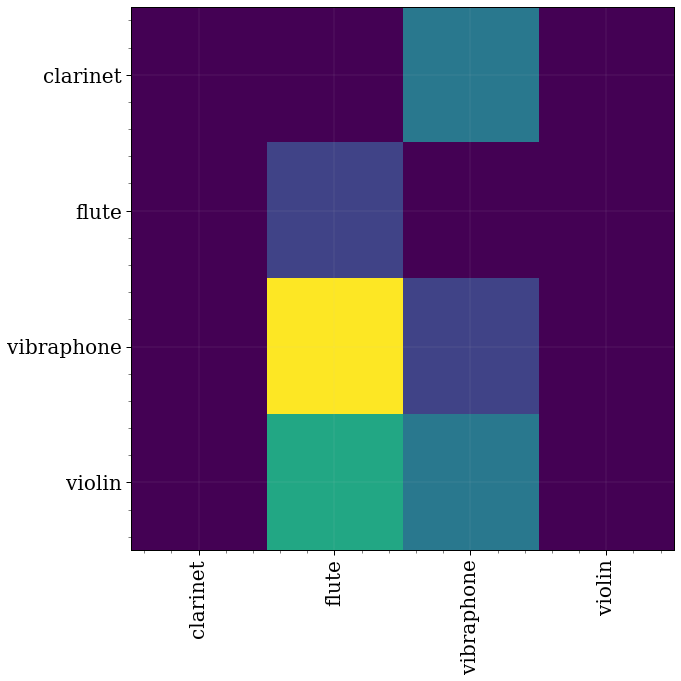

In [ ]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.xticks([0, 1, 2, 3], cat.categories, rotation=90)
plt.yticks([0, 1, 2, 3], cat.categories);

## Tarefas

1. Altere o código acima para extrair mais features usando LibRosa
1. Compare outros classificadores via SKLearn
1. Adicione mais exemplos
   1. Aqui você pode pegar diferentes partes de um mesmo áudio para aumentar a base

## Referências

O notebook acima foi inspirado no curso da MTG.

1. https://github.com/MTG/MIRCourse/blob/master/notebooks/Lecture1_IntroWithACaseStudy.ipynb